In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
train = pd.read_csv("USCensusTraining.csv")
test = pd.read_csv("USCensusTest.csv")
train

,age,workclass,demogweight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K.
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K.
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K.
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K.
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,41,Private,112507,10th,6,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,60,United-States,<=50K.
24996,19,Private,236940,HS-grad,9,Never-married,Farming-fishing,Own-child,White,Male,0,0,40,United-States,<=50K.
24997,33,Private,278514,HS-grad,9,Divorced,Craft-repair,Own-child,White,Female,0,0,42,United-States,<=50K.
24998,21,?,433330,Some-college,10,Never-married,?,Unmarried,White,Male,0,0,40,United-States,<=50K.


In [3]:
test

,age,workclass,demogweight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,44,Private,162028,11th,7,Divorced,Sales,Unmarried,White,Female,0,0,44,United-States
1,20,Private,197997,Some-college,10,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States
2,46,Private,98350,10th,6,Married-spouse-absent,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,37,China
3,39,Private,165848,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,United-States
4,34,Private,178615,HS-grad,9,Never-married,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States
7557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States
7558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States
7559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States


In [4]:
cat_var = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'native-country']

In [5]:
train[cat_var] = train[cat_var].replace(['?'], np.nan)
print(train[cat_var].isnull().sum())

workclass         1399
education            0
marital-status       0
occupation        1404
relationship         0
native-country     445
dtype: int64


In [6]:
test[cat_var] = test[cat_var].replace(['?'], np.nan)
print(test[cat_var].isnull().sum())

workclass         437
education           0
marital-status      0
occupation        439
relationship        0
native-country    138
dtype: int64


In [7]:
#Replace the missing value with Unknown
for df in [train, test]:
    df[cat_var] = df[cat_var].apply(lambda s: s.astype('object').str.strip())
    df[cat_var] = df[cat_var].fillna("Unknown")

In [8]:
print((train[cat_var] == '?').sum().sum())
print(train[cat_var].isnull().sum().sum())

0
0


In [9]:
#Percentage of unknowns in the dataset
total_unknown = (train[cat_var] == "Unknown").sum().sum()
total_cells = train[cat_var].size
overall_unknown_pct = 100 * total_unknown / total_cells
overall_unknown_pct

np.float64(2.1653333333333333)

In [10]:
train_cat = pd.get_dummies(train[cat_var], dtype = int)
income_dummies = pd.get_dummies(train['income'], dtype = int)
train_cat = pd.concat([train_cat, income_dummies], axis=1)
test_cat  = pd.get_dummies(test[cat_var], dtype = int)

In [11]:
train_cat

,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Unknown,workclass_Without-pay,education_10th,...,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Unknown,native-country_Vietnam,native-country_Yugoslavia,<=50K.,>50K.
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
24996,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
24997,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
24998,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0


In [12]:
quant_cols = ['age', 'demogweight', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

In [13]:
print(train[quant_cols].info())
print(train[quant_cols].describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             25000 non-null  int64
 1   demogweight     25000 non-null  int64
 2   education-num   25000 non-null  int64
 3   capital-gain    25000 non-null  int64
 4   capital-loss    25000 non-null  int64
 5   hours-per-week  25000 non-null  int64
dtypes: int64(6)
memory usage: 1.1 MB
None
                age   demogweight  education-num  capital-gain  capital-loss  \
count  25000.000000  2.500000e+04   25000.000000  25000.000000   25000.00000   
mean      38.606920  1.897418e+05      10.081440   1088.579040      86.49992   
std       13.687769  1.052947e+05       2.557035   7486.621197     401.25358   
min       17.000000  1.228500e+04       1.000000      0.000000       0.00000   
25%       28.000000  1.179630e+05       9.000000      0.000000       0.00000   
50%       37.000000  1.78

In [14]:
print(train[quant_cols].isnull().sum())

age               0
demogweight       0
education-num     0
capital-gain      0
capital-loss      0
hours-per-week    0
dtype: int64


In [15]:
print(test[quant_cols].isnull().sum())

age               0
demogweight       0
education-num     0
capital-gain      0
capital-loss      0
hours-per-week    0
dtype: int64


In [16]:
for col in quant_cols:
    Q1 = train[col].quantile(0.25)
    Q3 = train[col].quantile(0.75)
    IQR = Q3 - Q1
    if IQR > 0:
        lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
        train[col] = train[col].clip(lower, upper)
        test[col] = test[col].clip(lower, upper)

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_scaled = train.copy()
test_scaled = test.copy()

train_scaled[quant_cols] = scaler.fit_transform(train[quant_cols])
test_scaled[quant_cols] = scaler.transform(test[quant_cols])

In [18]:
print(train_scaled[quant_cols].describe())

                age   demogweight  education-num  capital-gain  capital-loss  \
count  2.500000e+04  2.500000e+04   2.500000e+04  2.500000e+04  2.500000e+04   
mean  -2.599165e-16 -2.728484e-17   8.895995e-17 -1.165290e-17 -3.524292e-17   
std    1.000020e+00  1.000020e+00   1.000020e+00  1.000020e+00  1.000020e+00   
min   -1.587193e+00 -1.838200e+00  -2.295809e+00 -1.454062e-01 -2.155785e-01   
25%   -7.780898e-01 -7.252011e-01  -4.584889e-01 -1.454062e-01 -2.155785e-01   
50%   -1.160961e-01 -8.917494e-02  -5.019558e-02 -1.454062e-01 -2.155785e-01   
75%    6.930074e-01  5.270301e-01   7.663911e-01 -1.454062e-01 -2.155785e-01   
max    2.899653e+00  2.405377e+00   2.399565e+00  1.321189e+01  1.064062e+01   

       hours-per-week  
count    2.500000e+04  
mean    -2.421530e-16  
std      1.000020e+00  
min     -1.405652e+00  
25%     -1.915832e-01  
50%     -1.915832e-01  
75%      6.177958e-01  
max      1.831864e+00  


In [19]:
print(train['capital-gain'].value_counts().head(10))
print(train['capital-loss'].value_counts().head(10))

capital-gain
0        22924
15024      263
7688       214
7298       182
99999      126
3103        72
5178        67
4386        57
5013        53
8614        41
Name: count, dtype: int64
capital-loss
0       23844
1902      159
1977      129
1887      110
2415       39
1485       38
1848       38
1876       35
1590       34
1602       32
Name: count, dtype: int64


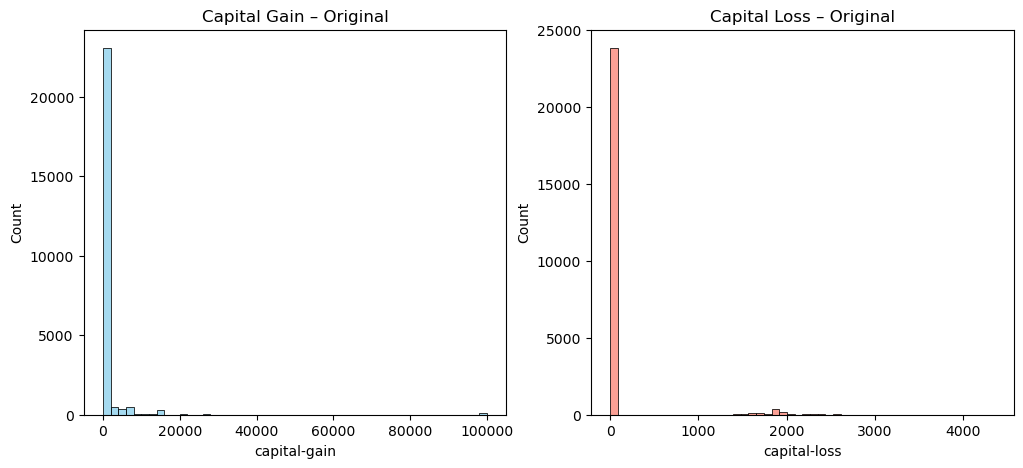

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(train['capital-gain'], bins=50, ax=axes[0], color='skyblue')
axes[0].set_title('Capital Gain – Original')
sns.histplot(train['capital-loss'], bins=50, ax=axes[1], color='salmon')
axes[1].set_title('Capital Loss – Original')
plt.show()

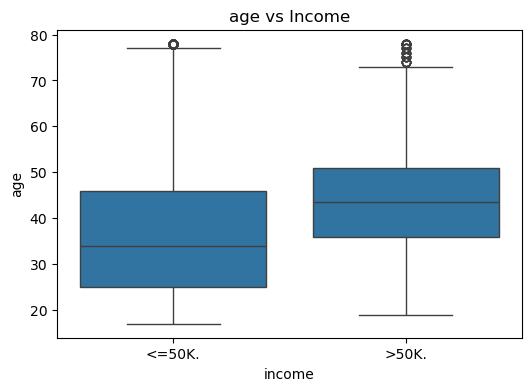

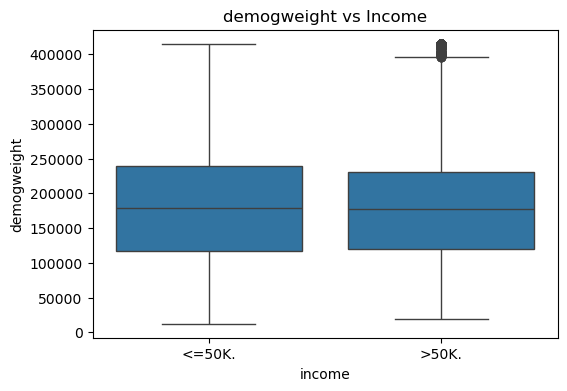

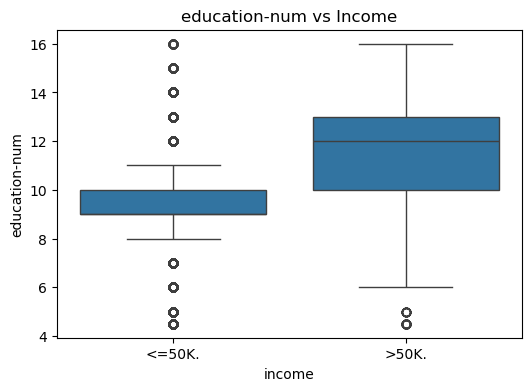

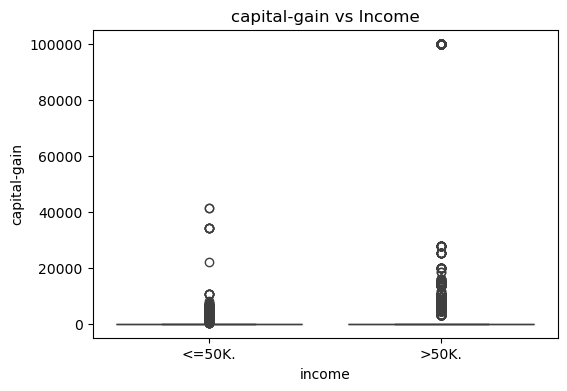

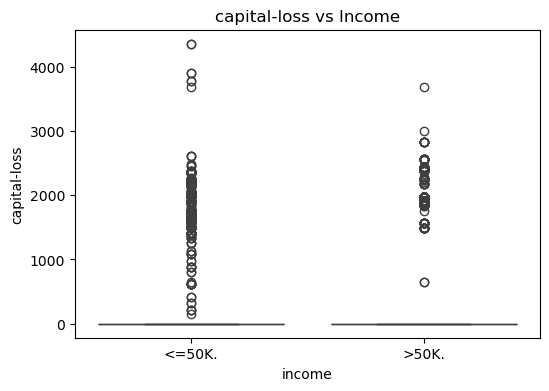

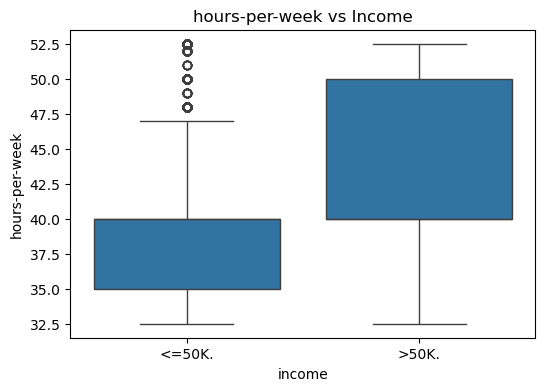

In [21]:
for col in quant_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='income', y=col, data=train)
    plt.title(f'{col} vs Income')
    plt.show()

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

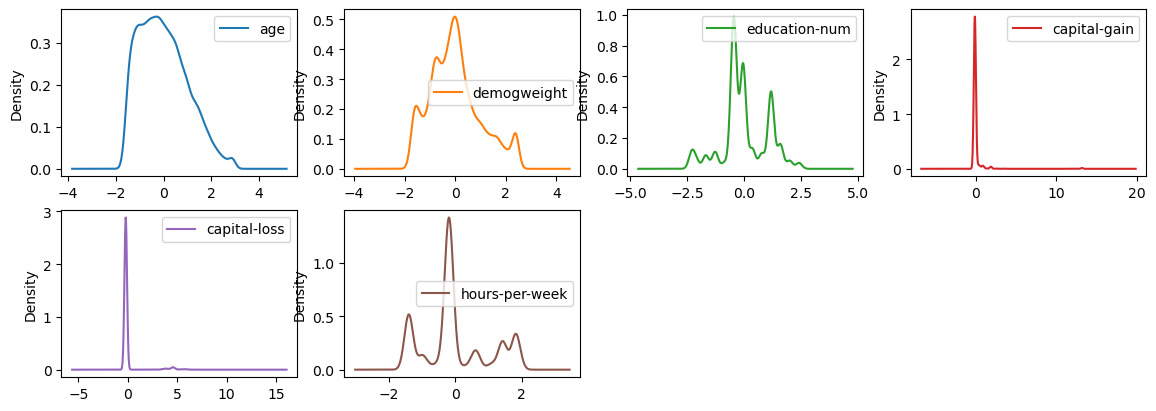

In [22]:
num = train_scaled[quant_cols].copy()
num = num.loc[:, num.nunique()>1]
num.plot(figsize =(14,10), kind='density', subplots=True, layout=(4,4), sharex=False)

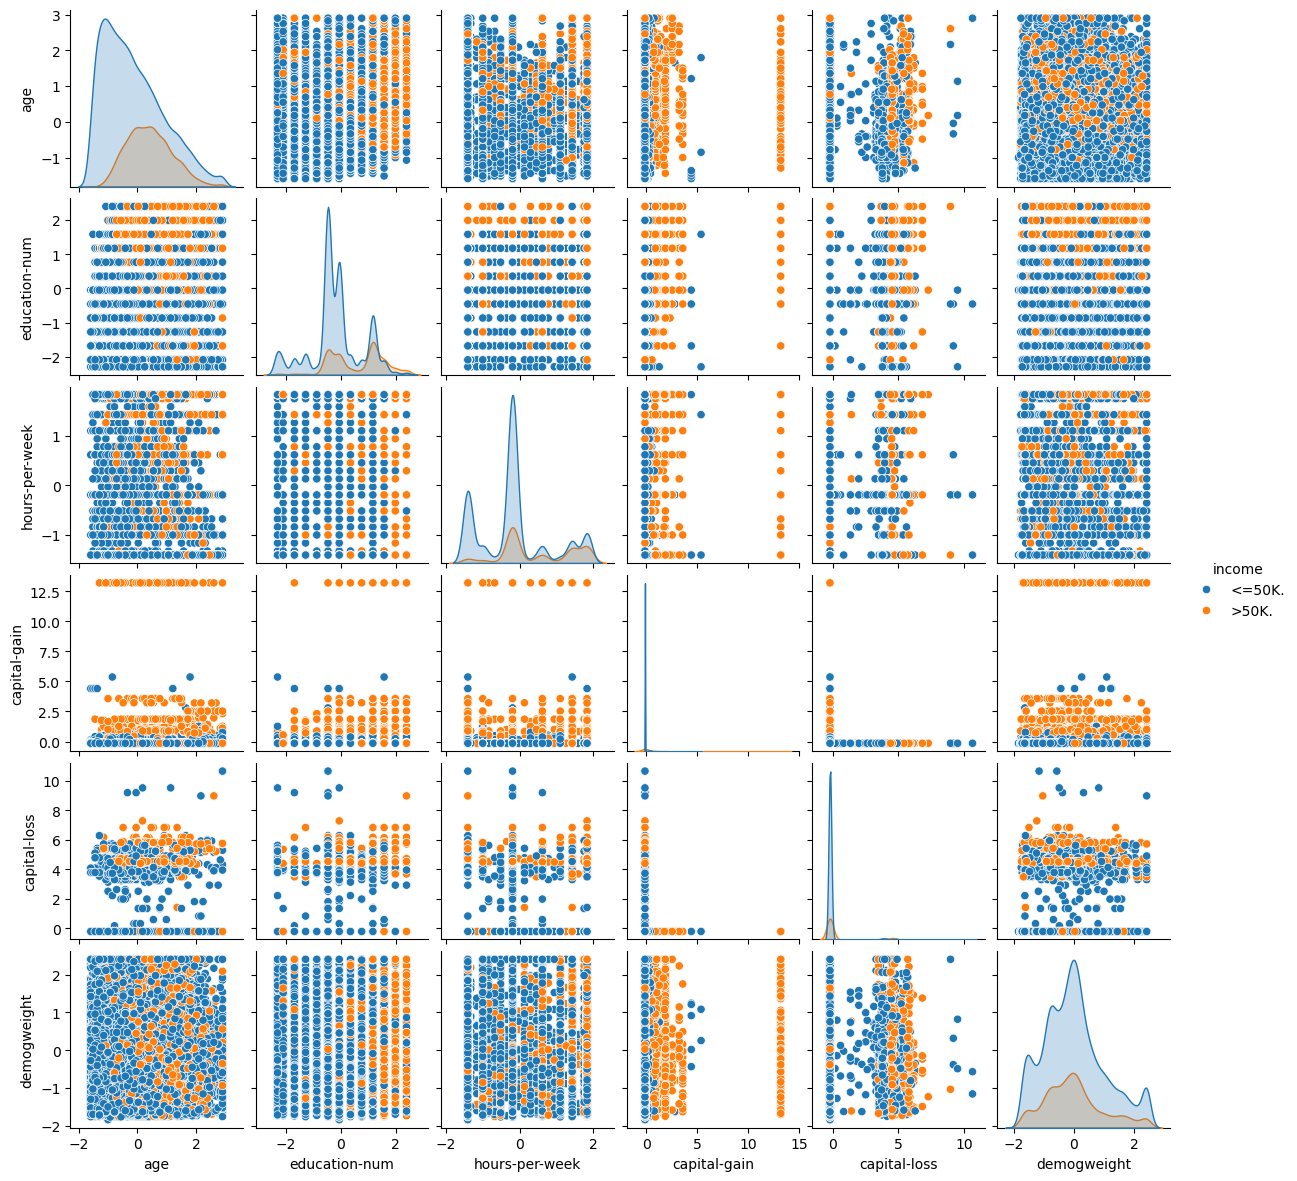

In [23]:
sns.pairplot(train_scaled, vars=['age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss', 'demogweight'], hue='income', height=2)
plt.show()

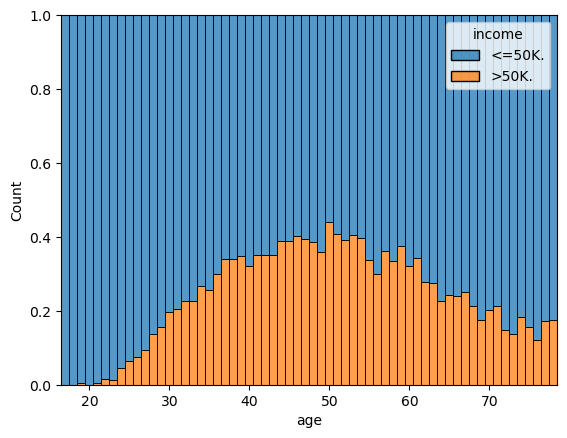

In [24]:
ax = sns.histplot(x="age", hue = "income", discrete=True,
                  multiple="fill", data=train)

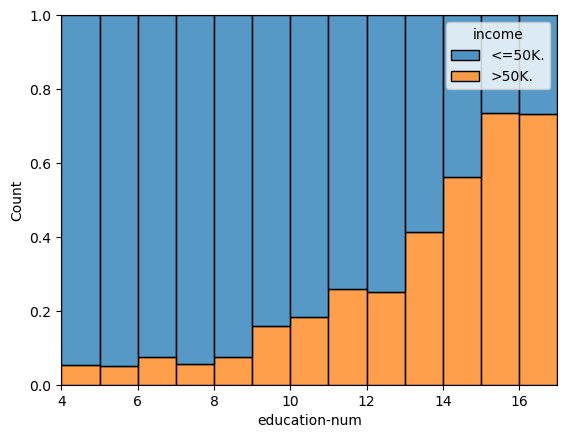

In [25]:
ax = sns.histplot(x="education-num", hue = "income", discrete=True,
                  multiple="fill", data=train)

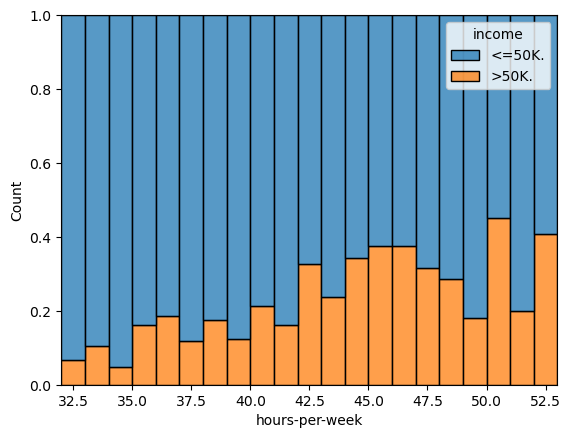

In [26]:
ax = sns.histplot(x="hours-per-week", hue = "income", discrete=True,
                  multiple="fill", data=train)

/opt/conda/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/opt/conda/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


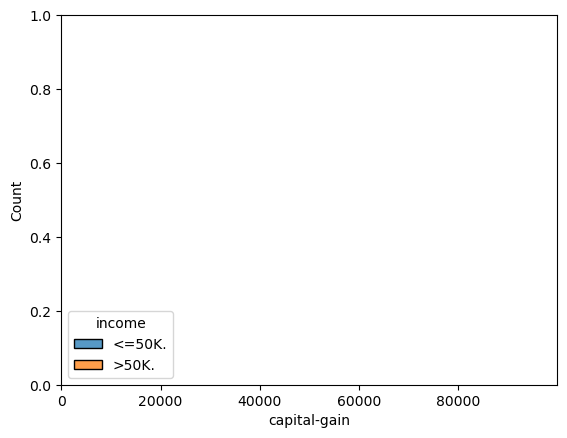

In [27]:
ax = sns.histplot(x="capital-gain", hue = "income", discrete=True,
                  multiple="fill", data=train)

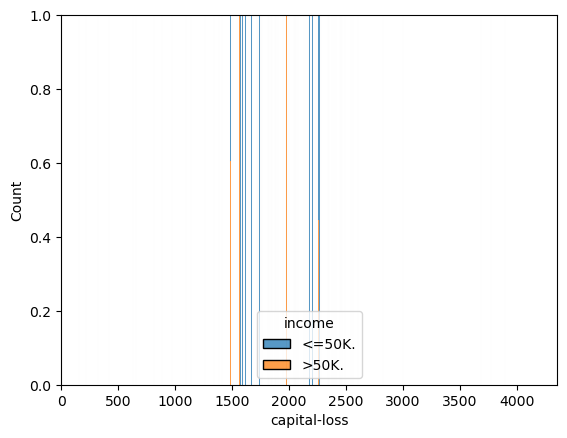

In [28]:
ax = sns.histplot(x="capital-loss", hue = "income", discrete=True,
                  multiple="fill", data=train)

In [ ]:
ax = sns.histplot(x="demogweight", hue = "income", discrete=True,
                  multiple="fill", data=train)

In [ ]:
plt.figure(figsize=(8,6))
corr = train_scaled[quant_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
train['capital-gain-log'] = np.log1p(train['capital-gain'])
train['capital-loss-log'] = np.log1p(train['capital-loss'])

In [ ]:
train_final = pd.concat([train_scaled[quant_cols], train_cat], axis=1)
test_final  = pd.concat([test_scaled[quant_cols], test_cat], axis=1)

In [ ]:
train_final.to_csv("USCensusTraining_final.csv", index=False)
test_final.to_csv("USCensusTest_final.csv", index=False)

In [ ]:
train_final